In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msn
from scipy.stats import norm, probplot, zscore
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

In [2]:
train["MSSubClass"] = train["MSSubClass"].astype("object")

In [3]:
train.drop(columns=["Id"], inplace=True)

In [4]:
train.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtCond           37
BsmtQual           37
BsmtFinType1       37
MasVnrArea          8
Electrical          1
MSSubClass          0
Fireplaces          0
Functional          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
CentralAir

In [5]:
train["Fence"] = train["Fence"].fillna("NA")
train["FireplaceQu"] = train["FireplaceQu"].fillna("NA")
train["PoolQC"] = train["PoolQC"].fillna("NA")
train["MiscFeature"] = train["MiscFeature"].fillna("NA")
train["Alley"] = train["Alley"].fillna("NA")
train["MasVnrType"] = train["MasVnrType"].fillna("NA")

In [6]:
train["Electrical"] = train["Electrical"].fillna(train["Electrical"].mode()[0])

In [7]:
garage_feature1 = ["GarageCond", "GarageType", "GarageFinish", "GarageQual"]
for column in garage_feature1:
    train[column] = train[column].fillna("NA")

In [8]:
train["GarageYrBlt"] = train["GarageYrBlt"].fillna(train["GarageYrBlt"].median())

In [9]:
basement_feature1 = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
for column in basement_feature1:
    train[column] = train[column].fillna("NA")

In [10]:
MasVnrArea_median = train["MasVnrArea"].median()
train["MasVnrArea"] = train["MasVnrArea"].fillna(MasVnrArea_median)

In [11]:
LotFrontage_median = train["LotFrontage"].median()
train["LotFrontage"] = train["LotFrontage"].fillna(LotFrontage_median)

In [12]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NA,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [13]:
categorical_features = [feature for feature in train.columns if train[feature].dtypes == 'O']

In [14]:
train[categorical_features].head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
1,20,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NA,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
2,60,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
3,70,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NA,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NA,NA,NA,WD,Abnorml
4,60,RL,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal


In [15]:
# One Hot Encoding
train = pd.get_dummies(train, drop_first=True, columns=['CentralAir', 'Street', 'PavedDrive', 'LandSlope'])
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,CentralAir_Y,Street_Pave,PavedDrive_P,PavedDrive_Y,LandSlope_Mod,LandSlope_Sev
0,60,RL,65.0,8450,NA,Reg,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,2003.0,RFn,2,548,TA,TA,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500,True,True,False,True,False,False
1,20,RL,80.0,9600,NA,Reg,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500,True,True,False,True,False,False
2,60,RL,68.0,11250,NA,IR1,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500,True,True,False,True,False,False
3,70,RL,60.0,9550,NA,IR1,Lvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NA,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000,True,True,False,True,False,False
4,60,RL,84.0,14260,NA,IR1,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000,True,True,False,True,False,False


In [16]:
# Ordinal Encoding
for col in ['GarageQual', 'GarageCond', 'ExterQual','ExterCond','HeatingQC','KitchenQual', 'PoolQC', 'BsmtQual','BsmtCond', 'FireplaceQu']:
    train[col]= train[col].replace({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})

/var/folders/35/99j3bpln2nsbgqgvg3mtzfxm0000gn/T/ipykernel_5851/287761942.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train[col]= train[col].replace({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})


In [17]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,CentralAir_Y,Street_Pave,PavedDrive_P,PavedDrive_Y,LandSlope_Mod,LandSlope_Sev
0,60,RL,65.0,8450,NA,Reg,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4,3,No,GLQ,706,Unf,0,150,856,GasA,5,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,0,Attchd,2003.0,RFn,2,548,3,3,0,61,0,0,0,0,0,NA,NA,0,2,2008,WD,Normal,208500,True,True,False,True,False,False
1,20,RL,80.0,9600,NA,Reg,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NA,0.0,3,3,CBlock,4,3,Gd,ALQ,978,Unf,0,284,1262,GasA,5,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,3,Attchd,1976.0,RFn,2,460,3,3,298,0,0,0,0,0,0,NA,NA,0,5,2007,WD,Normal,181500,True,True,False,True,False,False
2,60,RL,68.0,11250,NA,IR1,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4,3,Mn,GLQ,486,Unf,0,434,920,GasA,5,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,3,Attchd,2001.0,RFn,2,608,3,3,0,42,0,0,0,0,0,NA,NA,0,9,2008,WD,Normal,223500,True,True,False,True,False,False
3,70,RL,60.0,9550,NA,IR1,Lvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NA,0.0,3,3,BrkTil,3,4,No,ALQ,216,Unf,0,540,756,GasA,4,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,4,Detchd,1998.0,Unf,3,642,3,3,0,35,272,0,0,0,0,NA,NA,0,2,2006,WD,Abnorml,140000,True,True,False,True,False,False
4,60,RL,84.0,14260,NA,IR1,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4,3,Av,GLQ,655,Unf,0,490,1145,GasA,5,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,3,Attchd,2000.0,RFn,3,836,3,3,192,84,0,0,0,0,0,NA,NA,0,12,2008,WD,Normal,250000,True,True,False,True,False,False


In [18]:
# Target Encoding
for col in ['BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'Fence', 'LotShape', 'LandContour', 'Utilities', 'GarageFinish', 'MSSubClass','MSZoning','LotConfig','Neighborhood', 'Condition1', 'Alley',
                  'Condition2', 'GarageType','Functional','SaleCondition','SaleType','Electrical' ,
                  'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd', 'BldgType',
                  'MasVnrType','Foundation','Heating','MiscFeature']:
    # print(col, train.groupby([col])['SalePrice'].mean().sort_values())
    ordinal_labels = train.groupby([col])['SalePrice'].mean().sort_values().index
    ordinal_labels2 = {k:i for i,k in enumerate(ordinal_labels,1)}
    train[col]=train[col].map(ordinal_labels2)

In [19]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,CentralAir_Y,Street_Pave,PavedDrive_P,PavedDrive_Y,LandSlope_Mod,LandSlope_Sev
0,15,4,65.0,8450,3,1,2,2,1,17,5,5,5,7,7,5,2003,2003,2,3,12,13,3,196.0,4,3,6,4,3,2,7,706,6,0,150,856,6,5,5,856,854,0,1710,1,0,2,1,3,1,4,8,7,0,0,6,2003.0,3,2,548,3,3,0,61,0,0,0,0,0,5,4,0,2,2008,5,5,208500,True,True,False,True,False,False
1,12,4,80.0,9600,3,1,2,2,2,21,3,5,5,6,6,8,1976,1976,2,3,5,6,2,0.0,3,3,3,4,3,5,5,978,6,0,284,1262,6,5,5,1262,0,0,1262,0,1,2,0,3,1,3,6,7,1,3,6,1976.0,3,2,460,3,3,298,0,0,0,0,0,0,5,4,0,5,2007,5,5,181500,True,True,False,True,False,False
2,15,4,68.0,11250,3,2,2,2,1,17,5,5,5,7,7,5,2001,2002,2,3,12,13,3,162.0,4,3,6,4,3,3,7,486,6,0,434,920,6,5,5,920,866,0,1786,1,0,2,1,3,1,4,6,7,1,3,6,2001.0,3,2,608,3,3,0,42,0,0,0,0,0,5,4,0,9,2008,5,5,223500,True,True,False,True,False,False
3,10,4,60.0,9550,3,2,2,2,3,18,5,5,5,7,7,5,1915,1970,2,3,6,9,2,0.0,3,3,2,3,4,2,5,216,6,0,540,756,6,4,5,961,756,0,1717,1,0,1,0,3,1,4,7,7,1,4,3,1998.0,2,3,642,3,3,0,35,272,0,0,0,0,5,4,0,2,2006,5,2,140000,True,True,False,True,False,False
4,15,4,84.0,14260,3,2,2,2,2,25,5,5,5,7,8,5,2000,2000,2,3,12,13,3,350.0,4,3,6,4,3,4,7,655,6,0,490,1145,6,5,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,7,1,3,6,2000.0,3,3,836,3,3,192,84,0,0,0,0,0,5,4,0,12,2008,5,5,250000,True,True,False,True,False,False


In [20]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

2024-05-28 18:37:50.039066: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [21]:
to_train = train.astype('float64')

In [22]:
to_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   MSZoning       1460 non-null   float64
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Alley          1460 non-null   float64
 5   LotShape       1460 non-null   float64
 6   LandContour    1460 non-null   float64
 7   Utilities      1460 non-null   float64
 8   LotConfig      1460 non-null   float64
 9   Neighborhood   1460 non-null   float64
 10  Condition1     1460 non-null   float64
 11  Condition2     1460 non-null   float64
 12  BldgType       1460 non-null   float64
 13  HouseStyle     1460 non-null   float64
 14  OverallQual    1460 non-null   float64
 15  OverallCond    1460 non-null   float64
 16  YearBuilt      1460 non-null   float64
 17  YearRemodAdd   1460 non-null   float64
 18  RoofStyl

In [23]:
to_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,CentralAir_Y,Street_Pave,PavedDrive_P,PavedDrive_Y,LandSlope_Mod,LandSlope_Sev
0,15.0,4.0,65.0,8450.0,3.0,1.0,2.0,2.0,1.0,17.0,5.0,5.0,5.0,7.0,7.0,5.0,2003.0,2003.0,2.0,3.0,12.0,13.0,3.0,196.0,4.0,3.0,6.0,4.0,3.0,2.0,7.0,706.0,6.0,0.0,150.0,856.0,6.0,5.0,5.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,4.0,8.0,7.0,0.0,0.0,6.0,2003.0,3.0,2.0,548.0,3.0,3.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,2.0,2008.0,5.0,5.0,208500.0,1.0,1.0,0.0,1.0,0.0,0.0
1,12.0,4.0,80.0,9600.0,3.0,1.0,2.0,2.0,2.0,21.0,3.0,5.0,5.0,6.0,6.0,8.0,1976.0,1976.0,2.0,3.0,5.0,6.0,2.0,0.0,3.0,3.0,3.0,4.0,3.0,5.0,5.0,978.0,6.0,0.0,284.0,1262.0,6.0,5.0,5.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,3.0,6.0,7.0,1.0,3.0,6.0,1976.0,3.0,2.0,460.0,3.0,3.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,5.0,2007.0,5.0,5.0,181500.0,1.0,1.0,0.0,1.0,0.0,0.0
2,15.0,4.0,68.0,11250.0,3.0,2.0,2.0,2.0,1.0,17.0,5.0,5.0,5.0,7.0,7.0,5.0,2001.0,2002.0,2.0,3.0,12.0,13.0,3.0,162.0,4.0,3.0,6.0,4.0,3.0,3.0,7.0,486.0,6.0,0.0,434.0,920.0,6.0,5.0,5.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,4.0,6.0,7.0,1.0,3.0,6.0,2001.0,3.0,2.0,608.0,3.0,3.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,9.0,2008.0,5.0,5.0,223500.0,1.0,1.0,0.0,1.0,0.0,0.0
3,10.0,4.0,60.0,9550.0,3.0,2.0,2.0,2.0,3.0,18.0,5.0,5.0,5.0,7.0,7.0,5.0,1915.0,1970.0,2.0,3.0,6.0,9.0,2.0,0.0,3.0,3.0,2.0,3.0,4.0,2.0,5.0,216.0,6.0,0.0,540.0,756.0,6.0,4.0,5.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,4.0,7.0,7.0,1.0,4.0,3.0,1998.0,2.0,3.0,642.0,3.0,3.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,2.0,2006.0,5.0,2.0,140000.0,1.0,1.0,0.0,1.0,0.0,0.0
4,15.0,4.0,84.0,14260.0,3.0,2.0,2.0,2.0,2.0,25.0,5.0,5.0,5.0,7.0,8.0,5.0,2000.0,2000.0,2.0,3.0,12.0,13.0,3.0,350.0,4.0,3.0,6.0,4.0,3.0,4.0,7.0,655.0,6.0,0.0,490.0,1145.0,6.0,5.0,5.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,4.0,9.0,7.0,1.0,3.0,6.0,2000.0,3.0,3.0,836.0,3.0,3.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,12.0,2008.0,5.0,5.0,250000.0,1.0,1.0,0.0,1.0,0.0,0.0


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
df_col = to_train.columns
scaled_columns = ['LotFrontage', 'LotArea', 'MasVnrArea', 'GrLivArea', 'GarageArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'SalePrice']
scaler = StandardScaler()
scaled_df = scaler.fit_transform(to_train[scaled_columns])
scaled_df = pd.DataFrame(scaled_df, columns=scaled_columns)
scaled_df.head()

,LotFrontage,LotArea,MasVnrArea,GrLivArea,GarageArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,SalePrice
0,-0.220875,-0.207142,0.514104,0.370333,0.351000,0.575425,-0.944591,-0.459303,-0.793434,0.347273
1,0.460320,-0.091886,-0.570750,-0.482512,-0.060731,1.171992,-0.641228,0.466465,0.257140,0.007288
2,-0.084636,0.073480,0.325915,0.515013,0.631726,0.092907,-0.301643,-0.313369,-0.627826,0.536154
3,-0.447940,-0.096897,-0.570750,0.383659,0.790804,-0.499274,-0.061670,-0.687324,-0.521734,-0.515281
4,0.641972,0.375148,1.366489,1.299326,1.698485,0.463568,-0.174865,0.199680,-0.045611,0.869843


In [26]:
to_train[scaled_columns] = scaled_df
to_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,CentralAir_Y,Street_Pave,PavedDrive_P,PavedDrive_Y,LandSlope_Mod,LandSlope_Sev
0,15.0,4.0,-0.220875,-0.207142,3.0,1.0,2.0,2.0,1.0,17.0,5.0,5.0,5.0,7.0,7.0,5.0,2003.0,2003.0,2.0,3.0,12.0,13.0,3.0,0.514104,4.0,3.0,6.0,4.0,3.0,2.0,7.0,0.575425,6.0,0.0,-0.944591,-0.459303,6.0,5.0,5.0,-0.793434,854.0,0.0,0.370333,1.0,0.0,2.0,1.0,3.0,1.0,4.0,8.0,7.0,0.0,0.0,6.0,2003.0,3.0,2.0,0.351000,3.0,3.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,2.0,2008.0,5.0,5.0,0.347273,1.0,1.0,0.0,1.0,0.0,0.0
1,12.0,4.0,0.460320,-0.091886,3.0,1.0,2.0,2.0,2.0,21.0,3.0,5.0,5.0,6.0,6.0,8.0,1976.0,1976.0,2.0,3.0,5.0,6.0,2.0,-0.570750,3.0,3.0,3.0,4.0,3.0,5.0,5.0,1.171992,6.0,0.0,-0.641228,0.466465,6.0,5.0,5.0,0.257140,0.0,0.0,-0.482512,0.0,1.0,2.0,0.0,3.0,1.0,3.0,6.0,7.0,1.0,3.0,6.0,1976.0,3.0,2.0,-0.060731,3.0,3.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,5.0,2007.0,5.0,5.0,0.007288,1.0,1.0,0.0,1.0,0.0,0.0
2,15.0,4.0,-0.084636,0.073480,3.0,2.0,2.0,2.0,1.0,17.0,5.0,5.0,5.0,7.0,7.0,5.0,2001.0,2002.0,2.0,3.0,12.0,13.0,3.0,0.325915,4.0,3.0,6.0,4.0,3.0,3.0,7.0,0.092907,6.0,0.0,-0.301643,-0.313369,6.0,5.0,5.0,-0.627826,866.0,0.0,0.515013,1.0,0.0,2.0,1.0,3.0,1.0,4.0,6.0,7.0,1.0,3.0,6.0,2001.0,3.0,2.0,0.631726,3.0,3.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,9.0,2008.0,5.0,5.0,0.536154,1.0,1.0,0.0,1.0,0.0,0.0
3,10.0,4.0,-0.447940,-0.096897,3.0,2.0,2.0,2.0,3.0,18.0,5.0,5.0,5.0,7.0,7.0,5.0,1915.0,1970.0,2.0,3.0,6.0,9.0,2.0,-0.570750,3.0,3.0,2.0,3.0,4.0,2.0,5.0,-0.499274,6.0,0.0,-0.061670,-0.687324,6.0,4.0,5.0,-0.521734,756.0,0.0,0.383659,1.0,0.0,1.0,0.0,3.0,1.0,4.0,7.0,7.0,1.0,4.0,3.0,1998.0,2.0,3.0,0.790804,3.0,3.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,2.0,2006.0,5.0,2.0,-0.515281,1.0,1.0,0.0,1.0,0.0,0.0
4,15.0,4.0,0.641972,0.375148,3.0,2.0,2.0,2.0,2.0,25.0,5.0,5.0,5.0,7.0,8.0,5.0,2000.0,2000.0,2.0,3.0,12.0,13.0,3.0,1.366489,4.0,3.0,6.0,4.0,3.0,4.0,7.0,0.463568,6.0,0.0,-0.174865,0.199680,6.0,5.0,5.0,-0.045611,1053.0,0.0,1.299326,1.0,0.0,2.0,1.0,4.0,1.0,4.0,9.0,7.0,1.0,3.0,6.0,2000.0,3.0,3.0,1.698485,3.0,3.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,12.0,2008.0,5.0,5.0,0.869843,1.0,1.0,0.0,1.0,0.0,0.0


In [27]:
x_columns = to_train.columns.drop('SalePrice')

x = to_train[x_columns].values
y = to_train['SalePrice'].values

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

/opt/miniconda3/envs/my_ai/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
35/35 - 2s - 69ms/step - accuracy: 0.0000e+00 - loss: 2753.2957 - val_accuracy: 0.0000e+00 - val_loss: 335.1928
Epoch 2/1000
35/35 - 0s - 5ms/step - accuracy: 0.0000e+00 - loss: 104.4758 - val_accuracy: 0.0000e+00 - val_loss: 277.8847
Epoch 3/1000
35/35 - 0s - 5ms/step - accuracy: 0.0000e+00 - loss: 26.2920 - val_accuracy: 0.0000e+00 - val_loss: 217.7309
Epoch 4/1000
35/35 - 0s - 5ms/step - accuracy: 0.0000e+00 - loss: 39.2887 - val_accuracy: 0.0000e+00 - val_loss: 258.5081
Epoch 5/1000
35/35 - 0s - 5ms/step - accuracy: 0.0000e+00 - loss: 50.8056 - val_accuracy: 0.0000e+00 - val_loss: 134.8718
Epoch 6/1000
35/35 - 0s - 9ms/step - accuracy: 0.0000e+00 - loss: 18.9575 - val_accuracy: 0.0000e+00 - val_loss: 47.5150
Epoch 7/1000
35/35 - 0s - 9ms/step - accuracy: 0.0000e+00 - loss: 3.9120 - val_accuracy: 0.0000e+00 - val_loss: 73.3263
Epoch 8/1000
35/35 - 0s - 5ms/step - accuracy: 0.0000e+00 - loss: 3.1861 - val_accuracy: 0.0000e+00 - val_loss: 60.3921
Epoch 9/1000
35/35 - 0s -

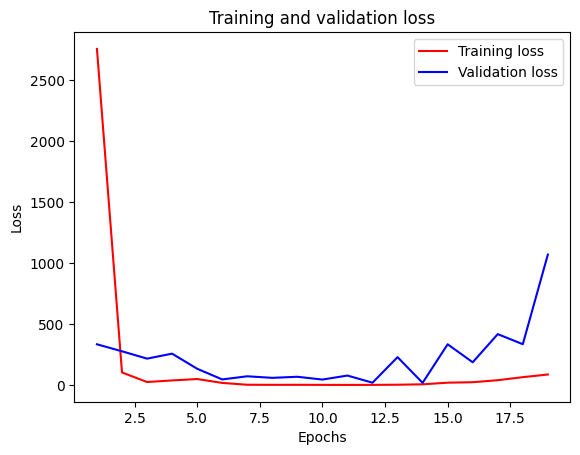

In [29]:
# Build the neural network
model = Sequential()
model.add(Dense(50, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(50, activation='relu')) # Hidden 2
model.add(Dense(50, activation='relu')) # Hidden 3
model.add(Dense(1)) # Output
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto', 
                        restore_best_weights=True)
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),
          callbacks=[monitor],verbose=2,epochs=1000)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'r', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()